In [140]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score


In [141]:
df = pd.read_csv('../processed-data/processed-data.csv')

In [142]:
df.head()

,Unnamed: 0,Age,Occupation,Annual_Income,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,pca_component_1,pca_component_2
0,0,23,12,19114.12,3,3,4,7.0,1,1.0,26.822620,22.0833,0,49.574949,4.387204,3,312.494089,2.0,-616.432092,-13.474437
1,1,23,12,19114.12,3,3,4,14.0,1,2.0,31.944960,0.0000,0,49.574949,4.773057,4,284.629162,2.0,-616.461504,-17.472881
2,3,23,12,19114.12,3,3,4,4.0,1,2.0,31.377862,22.3333,0,49.574949,5.295604,6,223.451310,2.0,-616.410033,-10.475604
3,4,23,12,19114.12,3,3,4,14.0,1,2.0,24.797347,22.4167,0,49.574949,3.723768,2,341.489231,2.0,-616.400608,-8.530153
4,5,23,12,19114.12,3,3,4,4.0,1,2.0,27.262259,22.5000,0,49.574949,4.134049,0,340.479212,2.0,-616.432092,-13.474437


In [143]:
df.shape

(97230, 20)

In [144]:
df.describe()

,Unnamed: 0,Age,Occupation,Annual_Income,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,pca_component_1,pca_component_2
count,97230.000000,97230.000000,97230.000000,9.723000e+04,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,9.723000e+04,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000
mean,49996.069937,33.328078,7.526432,1.768341e+05,17.127378,72.589777,2.956207,29.669917,1.410048,1.053029,32.284810,16.768525,0.523645,1396.464882,-inf,3.470688,401.639791,0.887771,-6.680855,-0.053822
std,28860.013439,10.795980,4.641414,1.432638e+06,117.683513,467.265779,62.231612,217.303927,1.347533,0.655713,5.117841,9.527908,0.499443,8279.638137,NaN,2.035411,212.689227,0.674843,1140.761776,12.022175
min,0.000000,14.000000,0.000000,7.005930e+03,-1.000000,1.000000,-100.000000,-3.000000,-2.000000,0.000000,20.000000,0.000000,0.000000,0.000000,-inf,0.000000,0.007760,0.000000,-1426.229460,-35.758228
25%,24999.250000,24.000000,4.000000,1.946381e+04,3.000000,8.000000,1.000000,9.000000,1.000000,1.000000,28.052564,9.500000,0.000000,30.338701,4.343519e+00,2.000000,270.914835,0.000000,-843.307982,-8.493077
50%,49978.500000,33.000000,7.000000,3.757975e+04,6.000000,13.000000,3.000000,14.000000,2.000000,1.000000,32.306296,17.333300,1.000000,69.272824,4.860168e+00,3.000000,336.660399,1.000000,-260.585576,-1.728582
75%,74993.750000,42.000000,12.000000,7.281486e+04,7.000000,20.000000,5.000000,18.000000,2.000000,1.000000,36.499412,24.333300,1.000000,161.405543,5.395206e+00,6.000000,467.397057,1.000000,474.877413,7.029496
max,99999.000000,118.000000,15.000000,2.419806e+07,1798.000000,5797.000000,1496.000000,4397.000000,8.000000,2.000000,50.000000,33.666700,1.000000,82331.000000,7.589501e+00,6.000000,1602.040519,2.000000,3571.682575,46.701571


In [145]:
df.drop(columns='Unnamed: 0',axis = 1,inplace=True)
df.dropna(inplace=True)
df.shape


(97230, 19)

In [146]:
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,pca_component_1,pca_component_2
0,23,12,19114.12,3,3,4,7.0,1,1.0,26.822620,22.0833,0,49.574949,4.387204,3,312.494089,2.0,-616.432092,-13.474437
1,23,12,19114.12,3,3,4,14.0,1,2.0,31.944960,0.0000,0,49.574949,4.773057,4,284.629162,2.0,-616.461504,-17.472881
2,23,12,19114.12,3,3,4,4.0,1,2.0,31.377862,22.3333,0,49.574949,5.295604,6,223.451310,2.0,-616.410033,-10.475604
3,23,12,19114.12,3,3,4,14.0,1,2.0,24.797347,22.4167,0,49.574949,3.723768,2,341.489231,2.0,-616.400608,-8.530153
4,23,12,19114.12,3,3,4,4.0,1,2.0,27.262259,22.5000,0,49.574949,4.134049,0,340.479212,2.0,-616.432092,-13.474437


In [147]:

def confusion_matrix_display(actual,predicted,n):
    conf_matrix =confusion_matrix(actual, predicted)
    print(f"confusion matrix heatmap for {n} records:")
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Poor', 'Predicted Standard','Predicted Good'],
            yticklabels=['True Poor', 'True Standard','True Good'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    

confusion matrix heatmap for 3000 records:


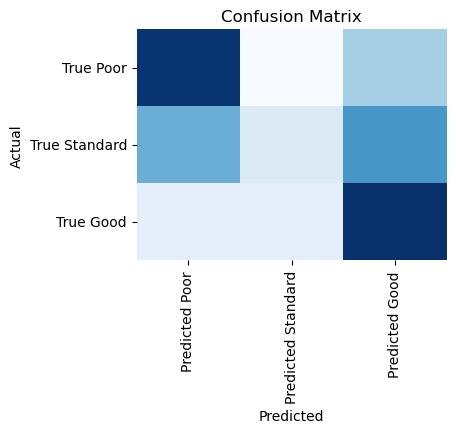

confusion matrix heatmap for 6000 records:


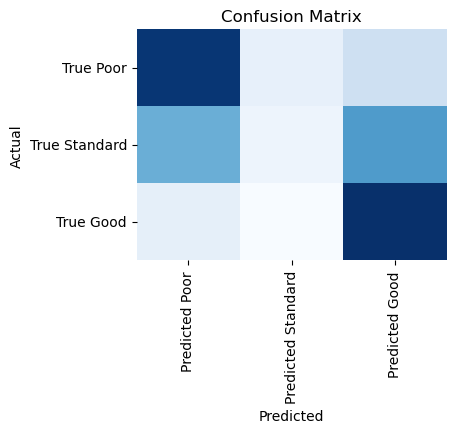

confusion matrix heatmap for 9000 records:


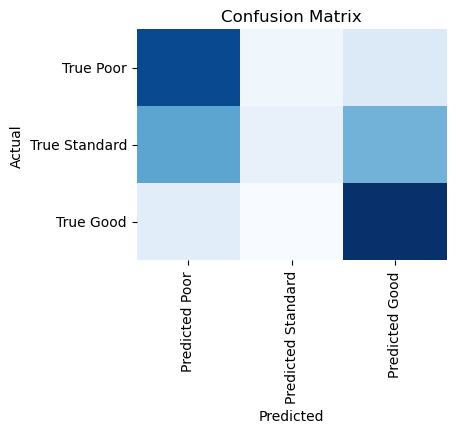

confusion matrix heatmap for 12000 records:


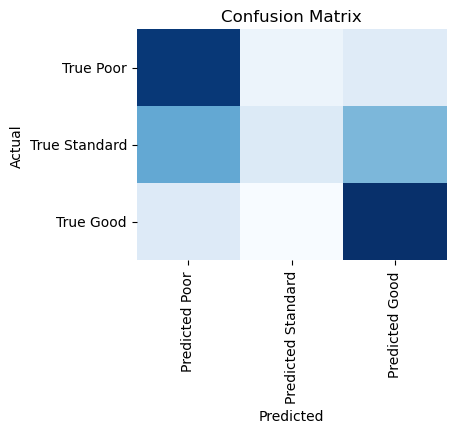

confusion matrix heatmap for 15000 records:


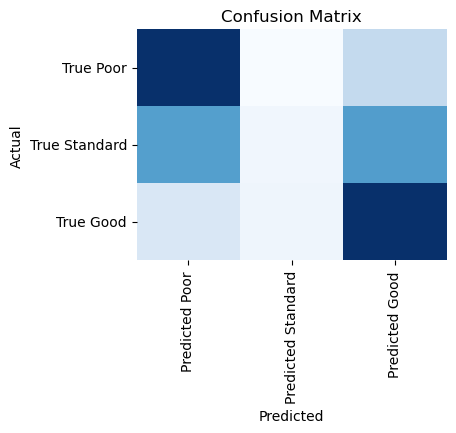

confusion matrix heatmap for 18000 records:


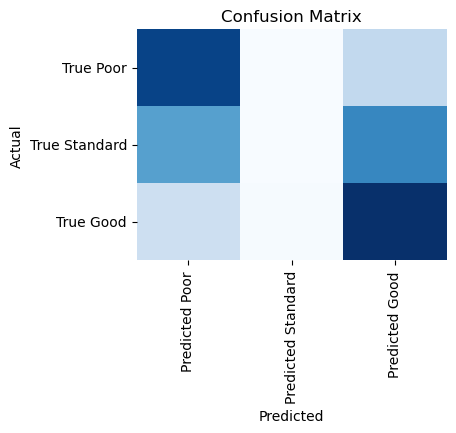

confusion matrix heatmap for 27000 records:


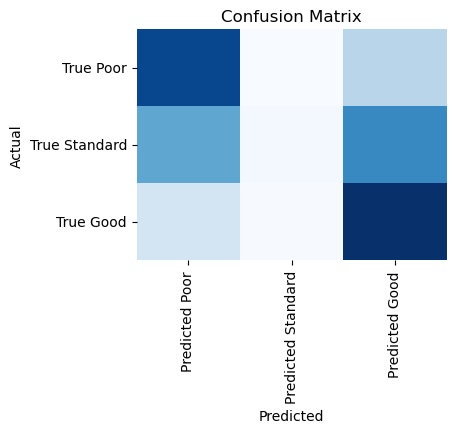

confusion matrix heatmap for 36000 records:


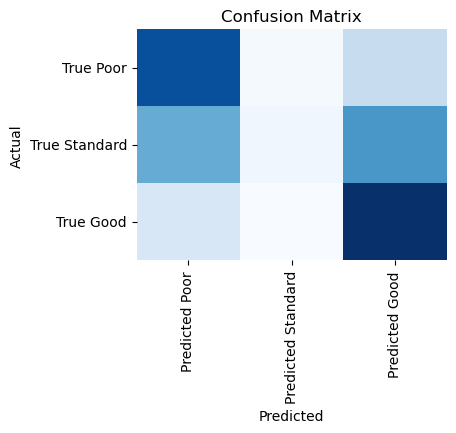

confusion matrix heatmap for 45000 records:


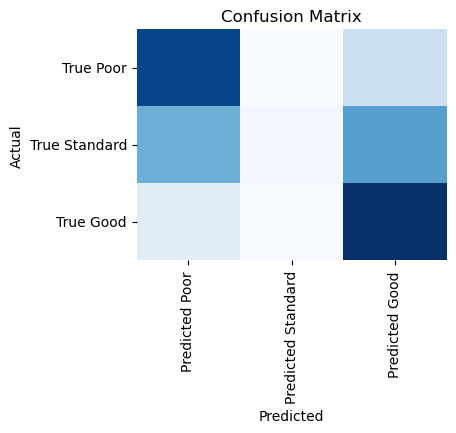

In [148]:
data = []
init_accuracy = 0
hmm = [[]]
def LR_accuracy(n=[1000,2000,3000,4000,5000,6000,9000,12000,15000],df = df,hmm = hmm):
    for i in n:
        df0 = df[df['Credit_Score']==0]
        df1 = df[df['Credit_Score']==1]
        df2 = df[df['Credit_Score']==2]
        

        
        df0 = df0.sample(replace = False,n =i,random_state=42)
        df1 = df1.sample(replace = False,n = i,random_state=42)
        df2 = df2.sample(replace = False,n = i,random_state=42)
        final_df = pd.concat([df0,df1,df2])

        X = final_df.drop(columns=['Credit_Score','Amount_invested_monthly'],axis=1)
        y = final_df['Credit_Score']


        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


        model=LogisticRegression(solver='liblinear',random_state=0)
        model.fit(X_train,y_train)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test,y_pred,average = 'weighted')
        f1 = f1_score(y_test,y_pred,average = 'weighted')
        recall = recall_score(y_test,y_pred,average = 'weighted')

        confusion_matrix_display(y_test,y_pred,i*3)



        indexx = i*3
        l1 = [indexx,accuracy,precision,f1,recall]
        data.append(l1)

    
LR_accuracy()

In [149]:
columns = ['Iterations','Accuracy','Precision', 'Recall', 'F1-score']
scores_df = pd.DataFrame(columns=columns,data=data)
scores_df

,Iterations,Accuracy,Precision,Recall,F1-score
0,3000,0.518667,0.505078,0.478480,0.518667
1,6000,0.518000,0.478475,0.471287,0.518000
2,9000,0.536889,0.505183,0.487739,0.536889
3,12000,0.571667,0.554760,0.523100,0.571667
4,15000,0.510667,0.470416,0.457725,0.510667
5,18000,0.490000,0.441184,0.425324,0.490000
6,27000,0.501333,0.466763,0.435689,0.501333
7,36000,0.499556,0.466960,0.448567,0.499556
8,45000,0.506311,0.472513,0.460608,0.506311


- We observe that the model has the best results when we take a sample size of 12000 records with this model outperforming every other model in all four of the scoring metrics.
- Also as we see in these confusion matrices we could almost clearly identify the true positives for the poor and good credit score categories but the model has failed to recognize the standard records properly implying that the model has failed with respect to the standard category classification.

In [150]:
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold,GridSearchCV

In [151]:
df0 = df[df['Credit_Score']==0]
df1 = df[df['Credit_Score']==1]
df2 = df[df['Credit_Score']==2]
        

        
df0 = df0.sample(replace = False,n =4000,random_state=42)
df1 = df1.sample(replace = False,n = 4000,random_state=42)
df2 = df2.sample(replace = False,n = 4000,random_state=42)
final_df = pd.concat([df0,df1,df2])

X = final_df.drop(columns=['Credit_Score','Amount_invested_monthly'],axis=1)
y = final_df['Credit_Score']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [152]:
model=LogisticRegression(solver='liblinear',random_state=0)
params = {}

params['C'] = [1,0.5,5,0.05]
params['penalty']=['l1','l2']
params['solver']=['liblinear','newton-cg','lbfgs','sag','saga']

cv = KFold(n_splits=5,shuffle=True,random_state=42)
grid = GridSearchCV(model,param_grid=params,scoring='accuracy',n_jobs = -1,cv = cv)

grid.fit(X_train,y_train)
grid.best_params_


/home/firewiz/Documents/code/credit-score-classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/firewiz/Documents/code/credit-score-classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/firewiz/Documents/code/credit-score-classification/venv/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/firewiz/Documents/code/credit-score-classification/venv/lib/python3.11/site-packages/sklearn/utils/optimize.py:43: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/home/firewiz/Documents/code/credit-score-classification/venv/lib/python3.11/si

{'C': 0.05, 'penalty': 'l2', 'solver': 'newton-cg'}

In [153]:
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.607



- With all the hyperparameter tuning we have reached an accuracy of 60.7% which is an improvement of 3% over the model with no tuning. After trying with various sample sizes we have come to the conclusion that the train dataset with 12000 records gives us the best results. 

#### Weight adjusting 


- seeing how the model has performed poorly with the standard category we will try different weights for the standard class and check if it improves our model accuracy any further.

In [154]:
df0 = df[df['Credit_Score']==0]
df1 = df[df['Credit_Score']==1]
df2 = df[df['Credit_Score']==2]

print(df0.shape,df1.shape,df2.shape)

(28208, 19) (51726, 19) (17296, 19)


In [162]:
def confusion_matrix_display_weights(actual,predicted,n):
    conf_matrix =confusion_matrix(actual, predicted)
    print(f"confusion matrix heatmap for standard weight:{n} ")
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Poor', 'Predicted Standard','Predicted Good'],
            yticklabels=['True Poor', 'True Standard','True Good'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

confusion matrix heatmap for standard weight:0.5 


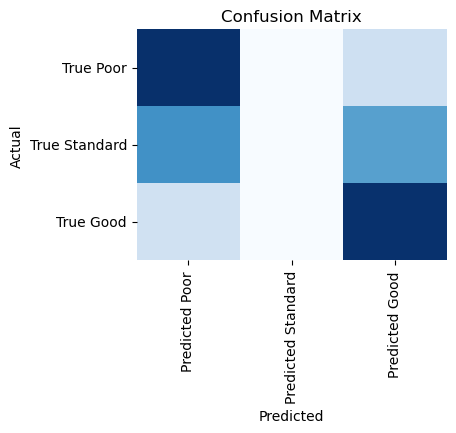

confusion matrix heatmap for standard weight:0.75 


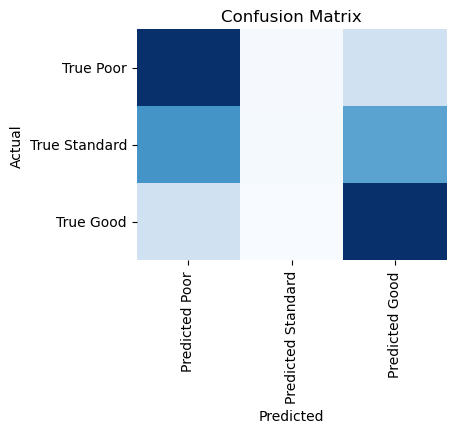

confusion matrix heatmap for standard weight:0.875 


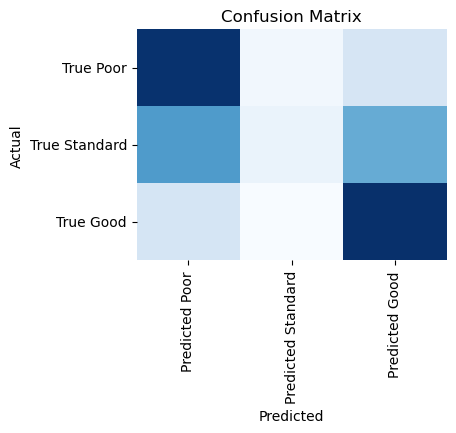

confusion matrix heatmap for standard weight:1 


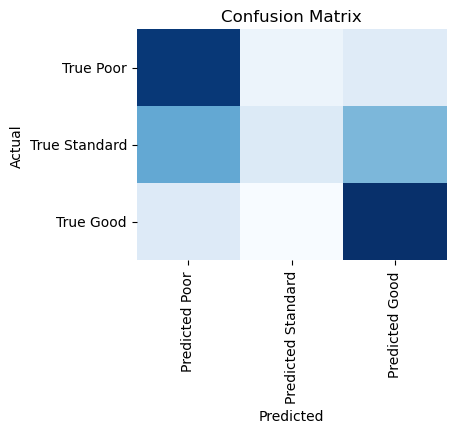

confusion matrix heatmap for standard weight:1.125 


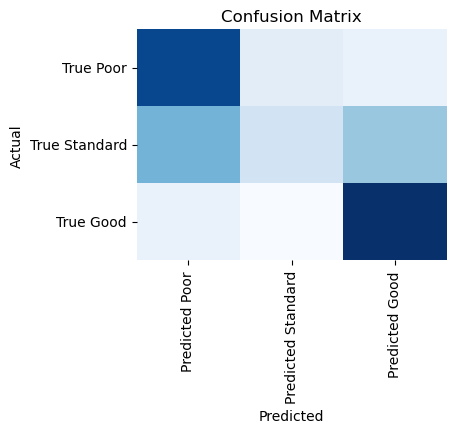

confusion matrix heatmap for standard weight:1.25 


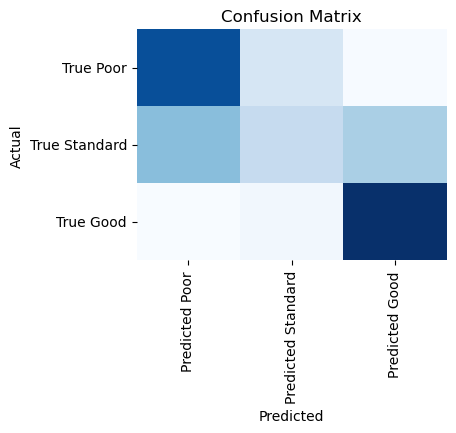

confusion matrix heatmap for standard weight:1.5 


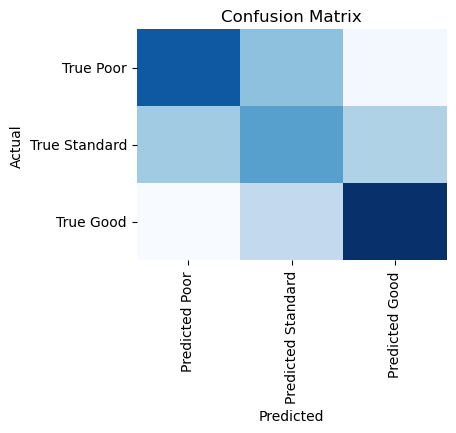

confusion matrix heatmap for standard weight:1.75 


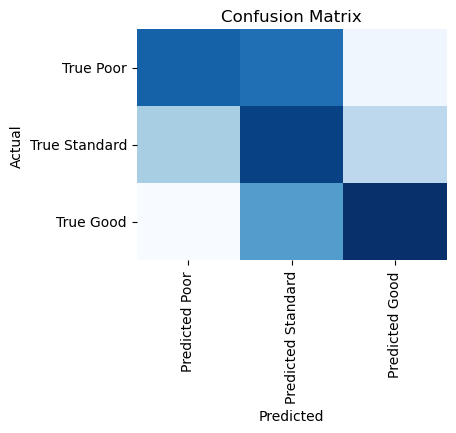

confusion matrix heatmap for standard weight:2 


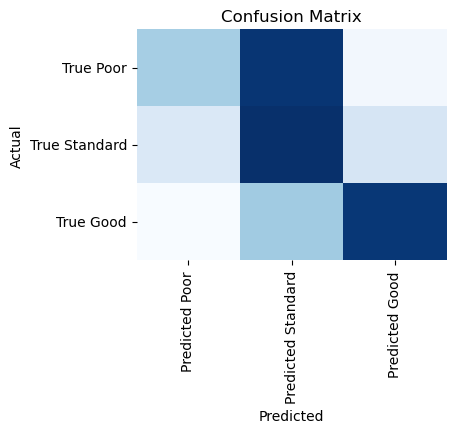

In [163]:
data_weights = []
def LR_accuracy_weights(n=4000,df = df,hmm = hmm,data=data_weights,weights_list=[0.5,0.75,0.875,1,1.125,1.25,1.5,1.75,2]):
    for i in weights_list:
        df0 = df[df['Credit_Score']==0]
        df1 = df[df['Credit_Score']==1]
        df2 = df[df['Credit_Score']==2]
        

        class_weights = {0: 1, 1: i,2: 1}
        df0 = df0.sample(replace = False,n =n,random_state=42)
        df1 = df1.sample(replace = False,n = n,random_state=42)
        df2 = df2.sample(replace = False,n = n,random_state=42)
        final_df = pd.concat([df0,df1,df2])

        X = final_df.drop(columns=['Credit_Score','Amount_invested_monthly'],axis=1)
        y = final_df['Credit_Score']


        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


        model=LogisticRegression(solver='liblinear',class_weight=class_weights,random_state=0)
        model.fit(X_train,y_train)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test,y_pred,average = 'weighted')
        f1 = f1_score(y_test,y_pred,average = 'weighted')
        recall = recall_score(y_test,y_pred,average = 'weighted')

        confusion_matrix_display_weights(y_test,y_pred,i)



        
        l1 = [i,accuracy,precision,f1,recall]
        data.append(l1)
LR_accuracy_weights()

In [161]:
columns = ['weights','Accuracy','Precision', 'Recall', 'F1-score']
scores_df = pd.DataFrame(columns=columns,data=data_weights)
scores_df

,weights,Accuracy,Precision,Recall,F1-score
0,0.500,0.555333,0.372130,0.445625,0.555333
1,0.750,0.558000,0.539483,0.459326,0.558000
2,0.875,0.564333,0.547445,0.489077,0.564333
3,1.000,0.571667,0.554760,0.523100,0.571667
4,1.125,0.566333,0.544994,0.535633,0.566333
5,1.250,0.554000,0.535174,0.536786,0.554000
6,1.500,0.541667,0.540821,0.541075,0.541667
7,1.750,0.522000,0.546775,0.527412,0.522000
8,2.000,0.512667,0.537951,0.504015,0.512667


### Key points to takeaway
- Eventhough increasing the weights has increased the number of true positives for the standard class it also affected heavily the classification of the other two classes causing the model accuracy to plummet.
- Another point to notice is the fact that even the number of TPs of the model has increased for the standard column the number of FPs also increased leading the models capability to be questionable.
- Last point to notice is the fact that the recall score increased as the weights increased due to the reduction of the number of the FNs of the model.
